In [84]:
import os
os.chdir('/home/victorh/projects/gtx')

import numpy as np
import mat73
import scipy.io as sio
import matplotlib.pyplot as plt

# Spatial frequency
fx = [0, 0.05, 0.1, 0.15, 0.2, 0.25] 

dt_data_path = 'data/20241118_data_splited.mat'
phantom_data_path = 'data/phantom_data.mat'
cylinder_data_path_r1 = 'data/cylinder/h1_r1_d2.mat'
cylinder_data_path_r2 = 'data/cylinder/h1_r2_d2.mat'


# Data

## DT data

In [76]:
# def load_dt_data(file_path):
#     data = sio.loadmat(file_path)
    
#     data = {k: v for k, v in data.items() if not k.startswith('__')}

#     return data

# all_data = load_dt_data('data/20241118_data_splited.mat')

# test_data = {
#     'fluorescence': all_data['test_fluorescence'],
#     'optical_props': all_data['test_optical_props'],
#     'reflectance': all_data['test_reflectance'],
#     'depth': all_data['test_depth'],
#     'concentration': all_data['test_concentration_fluor']
# }

## Phantom data

In [101]:
def load_phantom_data(file_path):
    mat_data = mat73.loadmat(file_path)
    return mat_data

temp_data = load_phantom_data(phantom_data_path)
phantom_data = {
    'fluorescence': temp_data['F'],
    'optical_props': temp_data['OP'],
    'reflectance': temp_data['RE'],
    'depth': temp_data['DF'],
    'concentration': temp_data['QF']
}

## Cylinder data

In [85]:
def load_cylinder_data(file_path):
    data = mat73.loadmat(file_path)
    return data

temp_data = load_cylinder_data(cylinder_data_path_r1)
cylinder_data_r1 = {
    'fluorescence': temp_data['F'],
    'optical_props': temp_data['OP'],
    'reflectance': temp_data['RE'],
    'depth': temp_data['DF'],
    'concentration': temp_data['QF']
}

temp_data = load_cylinder_data(cylinder_data_path_r2)
cylinder_data_r2 = {
    'fluorescence': temp_data['F'],
    'optical_props': temp_data['OP'],
    'reflectance': temp_data['RE'],
    'depth': temp_data['DF'],
    'concentration': temp_data['QF']
}

# Stats

In [86]:
def check_stats(data, idx=2, type='cylinder'):
    if type == 'cylinder':
        mu_a = data['optical_props'][:, :, 0]
        mu_sp = data['optical_props'][:, :, 1]
    elif type == 'phantom': # idx < 36
        mu_a = data['optical_props'][idx, :, :, 0]
        mu_sp = data['optical_props'][idx, :, :, 1]
    elif type == 'dt': # idx < 10000
        mu_a = data['optical_props'][idx, :, :, 0]
        mu_sp = data['optical_props'][idx, :, :, 1]
    else:
        raise ValueError(f'Invalid type: {type}')
    
    min_mu_a = np.min(mu_a)
    min_mu_sp = np.min(mu_sp)
    
    max_mu_a = np.max(mu_a)
    max_mu_sp = np.max(mu_sp)

    mean_mu_a = np.mean(mu_a)
    mean_mu_sp = np.mean(mu_sp)
    
    print(f'min_mu_a: {min_mu_a}, min_mu_sp: {min_mu_sp}')
    print(f'max_mu_a: {max_mu_a}, max_mu_sp: {max_mu_sp}')
    print(f'mean_mu_a: {mean_mu_a}, mean_mu_sp: {mean_mu_sp}')
    
check_stats(cylinder_data_r1, type='cylinder')

min_mu_a: 0.0036402950063347816, min_mu_sp: 0.974591076374054
max_mu_a: 0.005507920868694782, max_mu_sp: 1.02427077293396
mean_mu_a: 0.00453475397080183, mean_mu_sp: 1.0001111030578613


In [102]:
check_stats(phantom_data, type='phantom')

min_mu_a: 0.0028014779090881348, min_mu_sp: 0.8533279299736023
max_mu_a: 0.004124026279896498, max_mu_sp: 1.1222856044769287
mean_mu_a: 0.003465019864961505, mean_mu_sp: 0.9490421414375305


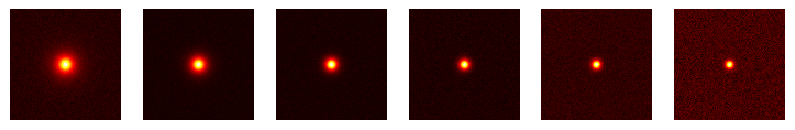

In [103]:
def draw_img(data, type='depth', idx=2, data_type='cylinder'):
    if type == 'depth':
        data = data['depth']
    elif type == 'concentration':
        data = data['concentration']
    elif type == 'fluorescence':
        data = data['fluorescence']
    elif type == 'reflectance':
        data = data['reflectance']
    elif type == 'optical_props':
        data = data['optical_props']
    else:
        raise ValueError(f'Invalid type: {type}')
    
    if data_type == 'cylinder': # 3 dim
        data = data
    elif data_type == 'phantom':
        data = data[idx, :, :, :]
    elif data_type == 'dt':
        data = data[idx, :, :, :]
    else:
        raise ValueError(f'Invalid data_type: {data_type}')
    
    if type == 'fluorescence' or type == 'reflectance':
        fig, axs = plt.subplots(1, 6, figsize=(10, 5))
        for i in range(6):
            axs[i].imshow(data[:, :, i], cmap='hot', interpolation='nearest')
            axs[i].axis('off')
        plt.show()
    elif type == 'optical_props':
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(data[:, :, 0], cmap='hot', interpolation='nearest')
        axs[0].set_title('mu_a')
        axs[0].axis('off')
        axs[1].imshow(data[:, :, 1], cmap='hot', interpolation='nearest')
        axs[1].set_title('mu_sp')
        axs[1].axis('off')
        plt.show()
    else:
        plt.imshow(data, cmap='hot', interpolation='nearest')
        plt.colorbar()
        plt.show()

draw_img(cylinder_data_r1, type='fluorescence', idx=2, data_type='cylinder')

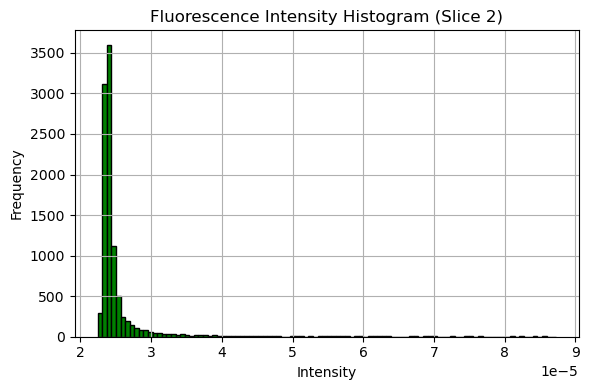

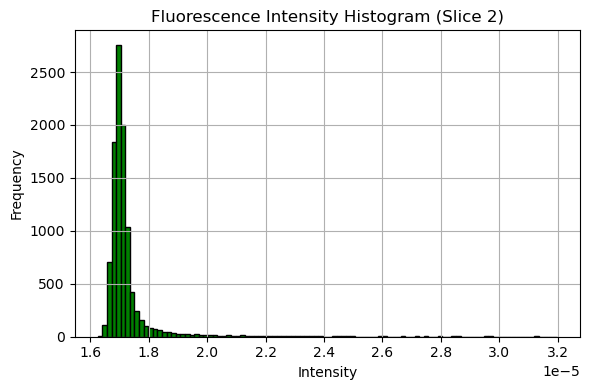

In [88]:
def draw_histogram(data, idx, data_type='cylinder'):

    if data_type == 'cylinder':
        data = data['fluorescence']
    elif data_type == 'phantom':
        data = data['fluorescence'][idx]
    elif data_type == 'dt':
        data = data['fluorescence'][idx]
    else:
        raise ValueError(f'Invalid data_type: {data_type}')

    d = data[:,:,0] # this is shape (101,101)
    pixels = d.ravel()

    plt.figure(figsize=(6, 4))
    plt.hist(pixels, bins=100, color='green', edgecolor='black')
    plt.title(f"Fluorescence Intensity Histogram")
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

draw_histogram(cylinder_data_r2, 2, data_type='cylinder')
draw_histogram(cylinder_data_r1, 2, data_type='cylinder')

# Modulation amplitude normalization

In [89]:
# normalization against f(0) given one sample
def normalization(F):
    F0 = F[:, :, 0]
    return F / (F0[:, :, np.newaxis] + 1e-20)

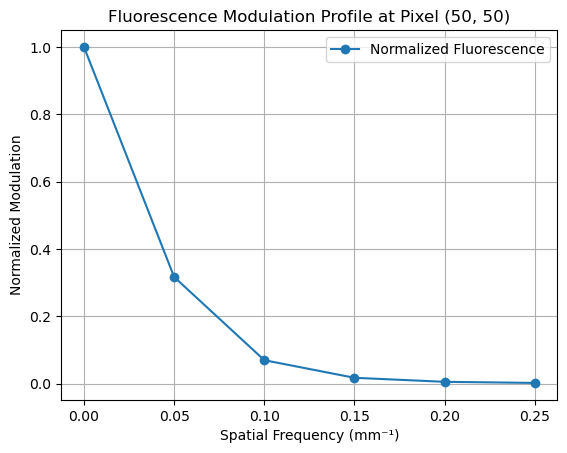

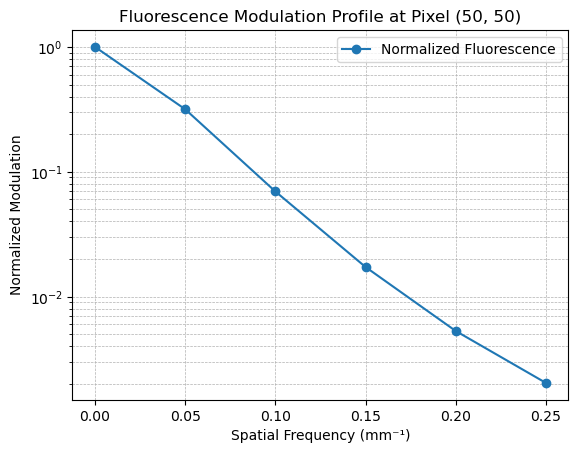

In [91]:
def plot_modulation_curve(x, y, f_norm):
    mf_curve = f_norm[y, x, :]
    plt.plot(fx, mf_curve, 'o-', label='Normalized Fluorescence')
    plt.xlabel('Spatial Frequency (mm⁻¹)')
    plt.ylabel('Normalized Modulation')
    plt.title('Fluorescence Modulation Profile at Pixel (50, 50)')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_modulation_curve_log(x, y, f_norm):
    mf_curve = f_norm[y, x, :]
    plt.plot(fx, mf_curve, 'o-', label='Normalized Fluorescence')
    plt.xlabel('Spatial Frequency (mm⁻¹)')
    plt.ylabel('Normalized Modulation')
    plt.title(f'Fluorescence Modulation Profile at Pixel ({x}, {y})')
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

s0 = cylinder_data_r2['fluorescence']
s0_norm = normalization(s0)
plot_modulation_curve(50, 50, s0_norm)
plot_modulation_curve_log(50, 50, s0_norm)


# LUT generation using greens function

In [92]:
def compute_k(mu_a, mu_sp, fx):
    fx = np.array(fx)
    k = np.sqrt(3 * mu_a * (mu_a + mu_sp + (4 * np.pi**2 * fx**2 / 3)))
    return k

def generate_LUT(fx, depth, mu_a, mu_sp):
    k_fx = compute_k(mu_a, mu_sp, fx)
    lut = {}

    for z in depth:
        phi = np.exp(-k_fx * z)
        phi /= phi[0]
        lut[z] = phi

    return lut

def generate_LUT_emperical(fx, depth, alpha=6):
    fx = np.array(fx)
    lut = {}
    for z in depth:
        curve = np.exp(-alpha * fx * z)
        curve /= curve[0]
        lut[z] = curve
    return lut

# Depth estimation

In [93]:
def fit_depth_from_curve(measured_curve, lut):
    min_error = np.inf
    best_depth = None

    for z, pred_curve in lut.items():
        error = np.sum((measured_curve - pred_curve) ** 2)
        if error < min_error:
            min_error = error
            best_depth = z

    return best_depth

In [100]:
def estimate_depth(data):
    depth_mm = np.linspace(0.5, 15, 200)

    F = data['fluorescence']
    F_norm = normalization(F)
    
    mu_a_map = data['optical_props'][:, :, 0]
    mu_sp_map = data['optical_props'][:, :, 1]

    depth_map = np.zeros((mu_a_map.shape[0], mu_a_map.shape[1]))

    for y in range(mu_a_map.shape[0]):
        for x in range(mu_a_map.shape[1]):
            mu_a = mu_a_map[y, x]
            mu_sp = mu_sp_map[y, x]
            norm_curve = F_norm[y, x, :]

            if np.any(np.isnan(norm_curve)) or np.mean(norm_curve) < 1e-3:
                depth_map[y, x] = np.nan
                continue

            # lut = generate_LUT(fx, depth_mm, mu_a, mu_sp)
            lut = generate_LUT_emperical(fx, depth_mm, alpha=9)
            best_depth = fit_depth_from_curve(norm_curve, lut)
            depth_map[y, x] = best_depth

    return depth_map    


# Eval

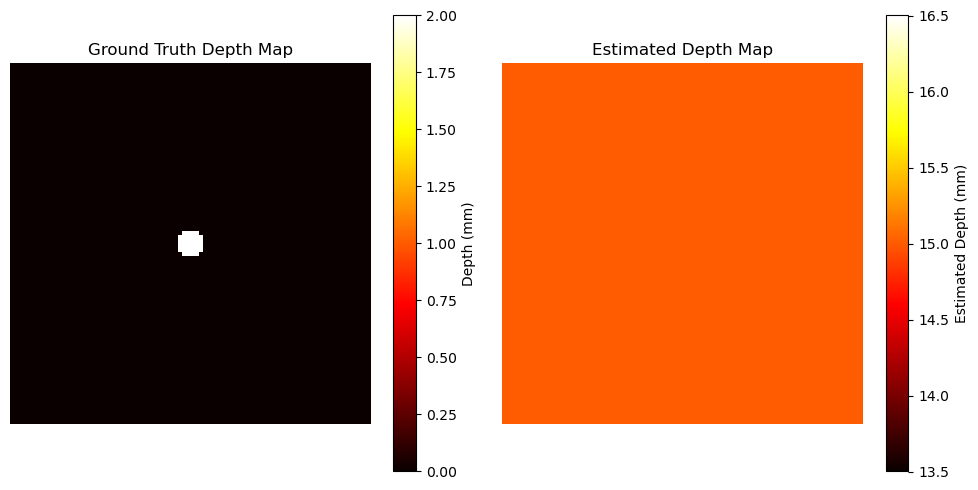

In [99]:
def predict_depth(data, region=None, idx=2, data_type='cylinder'):

    if data_type == 'dt' or data_type == 'phantom':
        data = {
            'fluorescence': data['fluorescence'][idx],
            'optical_props': data['optical_props'][idx],
            'depth': data['depth'][idx],
            'concentration': data['concentration'][idx],
            'reflectance': data['reflectance'][idx]
        }
    elif data_type == 'cylinder':
        data = data

    if region:
        data = {
            'fluorescence': data['fluorescence'][region[0]:region[1], region[0]:region[1], :],
            'optical_props': data['optical_props'][region[0]:region[1], region[0]:region[1], :],
            'depth': data['depth'][region[0]:region[1], region[0]:region[1]],
            'concentration': data['concentration'][region[0]:region[1], region[0]:region[1]],
            'reflectance': data['reflectance'][region[0]:region[1], region[0]:region[1]]
        }
    
    depth_map = estimate_depth(data)
    gt = data['depth']

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    im0 = axs[0].imshow(gt, cmap='hot', interpolation='nearest')
    axs[0].set_title(f"Ground Truth Depth Map")
    axs[0].axis('off')
    fig.colorbar(im0, ax=axs[0], label='Depth (mm)')  # Correct colorbar

    im1 = axs[1].imshow(depth_map, cmap='hot', interpolation='nearest')
    axs[1].set_title(f"Estimated Depth Map")
    axs[1].axis('off')
    fig.colorbar(im1, ax=axs[1], label='Estimated Depth (mm)')  # Correct colorbar

    fig.tight_layout()
    plt.show()

predict_depth(cylinder_data_r2, idx=2, data_type='cylinder')

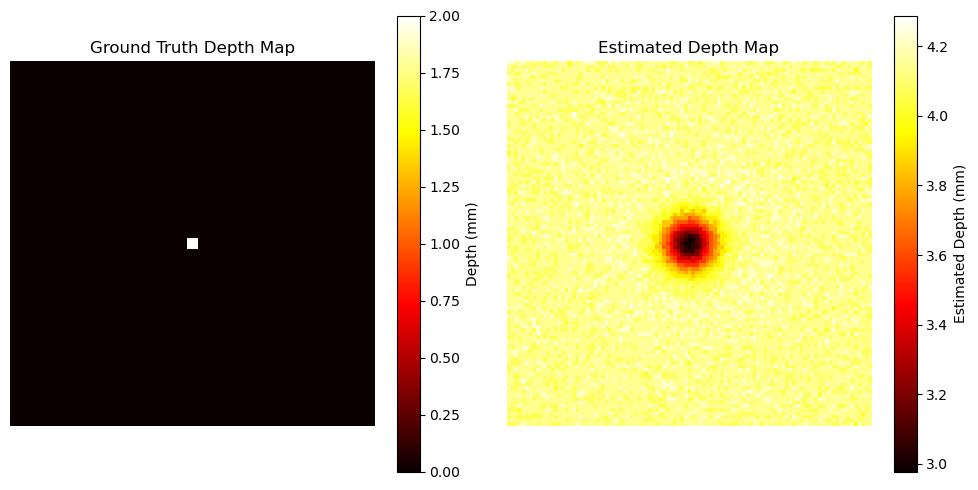

In [96]:
predict_depth(cylinder_data_r1, idx=2, data_type='cylinder')

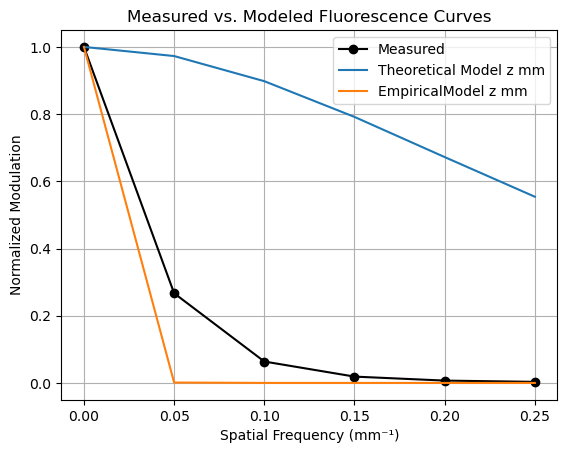

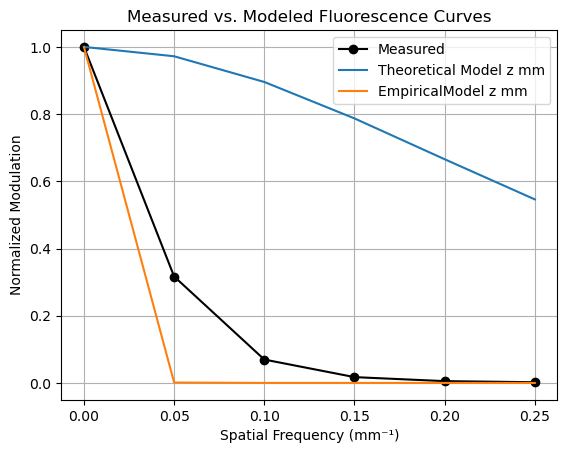

In [97]:
def plot_modulation_curve(x, y, data, idx=2, data_type='cylinder'):

    if data_type == 'cylinder':
        f = data['fluorescence']
        mu_a = data['optical_props'][:, :, 0]
        mu_sp = data['optical_props'][:, :, 1]
    elif data_type == 'phantom':
        f = data['fluorescence'][idx]
        mu_a = data['optical_props'][idx, :, :, 0]
        mu_sp = data['optical_props'][idx, :, :, 1]
    elif data_type == 'dt':
        f = data['fluorescence'][idx]
        mu_a = data['optical_props'][idx, :, :, 0]
        mu_sp = data['optical_props'][idx, :, :, 1]
    else:
        raise ValueError(f"Invalid data_type: {data_type}")
    
    f_norm = normalization(f)
    
    mu_a = mu_a[y, x]
    mu_sp = mu_sp[y, x]
    norm_curve = f_norm[y, x, :]

    depth_mm = np.linspace(0.5, 15, 200)
    lut = generate_LUT(fx, depth_mm, mu_a, mu_sp)
    lut2 = generate_LUT_emperical(fx, depth_mm, alpha=9)

    plt.plot(fx, norm_curve, 'ko-', label='Measured')
    for z, curve in lut.items():
        if z in [1, 3, 5, 7, 9, 11, 13, 15]:
            plt.plot(fx, curve, label=f'Theoretical Model z mm')

    for z, curve in lut2.items():
        if z in [1, 3, 5, 7, 9, 11, 13, 15]:
            plt.plot(fx, curve, label=f'EmpiricalModel z mm')
    
    plt.xlabel('Spatial Frequency (mm⁻¹)')
    plt.ylabel('Normalized Modulation')
    plt.legend()
    plt.title('Measured vs. Modeled Fluorescence Curves')
    plt.grid(True)
    plt.show()

plot_modulation_curve(50, 50, cylinder_data_r1, idx=2, data_type='cylinder')
plot_modulation_curve(50, 50, cylinder_data_r2, idx=2, data_type='cylinder')